# 用另一个数据集实现logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data3.txt'
data3 = pd.read_csv(path, header=None, names=['exam1', 'exam2', 'admitted'])
data3.head()

,exam1,exam2,admitted
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


数据可视化

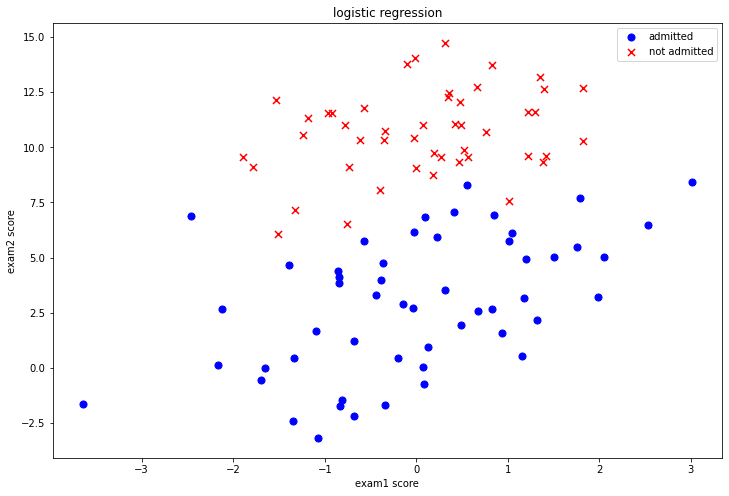

In [3]:
positive = data3[data3['admitted'].isin([1])]
negative = data3[data3['admitted'].isin([0])]
plt.figure(figsize=(12,8))
plt.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='admitted')
plt.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='not admitted')
plt.legend()
plt.xlabel('exam1 score')
plt.ylabel('exam2 score')
plt.title('logistic regression')
plt.show()

In [4]:
data3.insert(0, 'ones', 1)

In [5]:
cols = data3.shape[1]
X = np.matrix(data3.iloc[:, 0:cols-1].values)
y = np.matrix(data3.iloc[:, cols-1:cols].values)
theta = np.matrix(np.zeros(cols-1))
iters = 10000
alpha = 0.01

## sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## 代价函数：
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$$

In [7]:
def computeCost(theta, X, y):
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    #return np.array(np.sum(first - second) / (len(X)))
    return np.sum(first - second) / (len(X))

## 手动梯度下降 
代价函数的梯度$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [8]:
def gradientDescent(theta, X, y, alpha, iters):
    parameters = theta.shape[1]
    cost = np.zeros(iters) #代价曲线
    temp = np.matrix(np.zeros(theta.shape))
    
    for i in range(iters):
        error = sigmoid(X*theta.T)-y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - alpha*np.sum(term)/len(X)
        theta = temp
        cost[i] = computeCost(theta, X, y)
    return theta, cost

In [9]:
w, cost = gradientDescent(theta, X, y, alpha, iters)

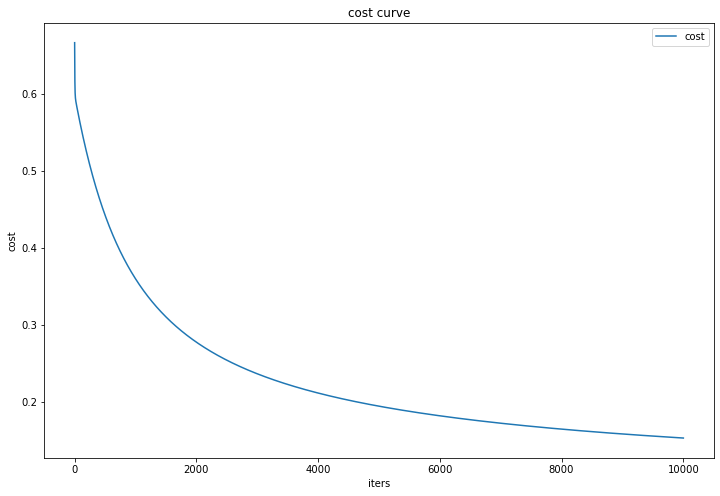

In [10]:
x = np.linspace(0, iters, iters)
plt.figure(figsize=(12, 8))
plt.xlabel('iters')
plt.ylabel('cost')
plt.title('cost curve')
plt.plot(x, cost, label='cost')
plt.legend()
plt.show()

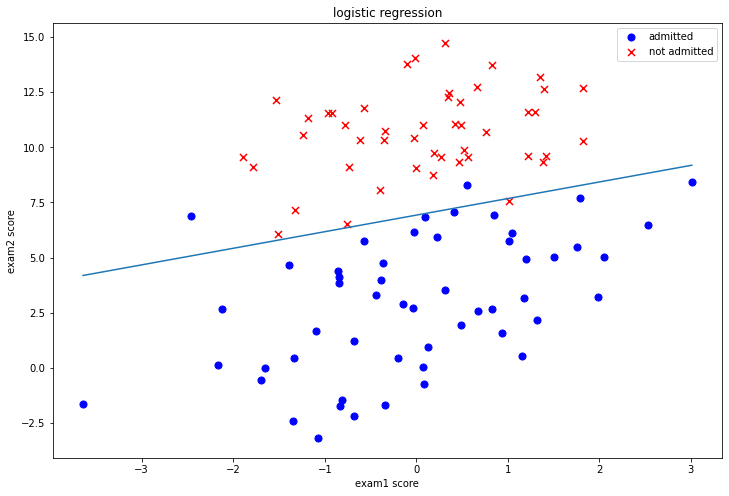

In [11]:
x = np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
f = -w[0, 0] / w[0, 2] - w[0, 1] / w[0, 2] * x

#fig, ax = plt.subplots(figsize=(12,8))
plt.figure(figsize=(12,8))
plt.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='admitted')
plt.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='not admitted')
plt.legend()
plt.xlabel('exam1 score')
plt.ylabel('exam2 score')
plt.title('logistic regression')
plt.plot(x, f, label='prediction')
plt.show()

In [12]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [13]:
predictions = predict(w, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 97%


# 从极大似然角度构建代价函数
最小化代价函数：
$$J\left( \theta  \right)=\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}{\beta}^{T}{x}^{(i)}-\ln \left( 1+{{e}^{{\beta}^{T}{x}^{(i)}}} \right)]}$$

In [14]:
def computeCost1(theta, X, y):
    first = np.multiply(-y, X*theta.T)
    second = np.log(1+np.exp(X*theta.T))
    return np.sum(first-second)

梯度下降求最优解：
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\sum\limits_{i=1}^{m}{(-{{y}^{(i)}}+\frac{{{e}^{{\beta}^{T}{x}^{(i)}}}}{1+{{e}^{{\beta}^{T}{x}^{(i)}}}})x_{_{j}}^{(i)}}$$

In [15]:
def gradientDescent1(theta, X, y, alpha, iters):
    parameters = theta.shape[1]
    cost = np.zeros(iters) #代价曲线
    temp = np.matrix(np.zeros(theta.shape))
    
    for i in range(iters):
        error = np.exp(X*theta.T)/(1+np.exp(X*theta.T))-y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - alpha*np.sum(term)
        theta = temp
        cost[i] = computeCost1(theta, X, y)
    return theta, cost

In [16]:
iters=1000
alpha=0.01
theta = np.matrix(np.zeros(cols-1))
w, cost = gradientDescent1(theta, X, y, alpha, iters)

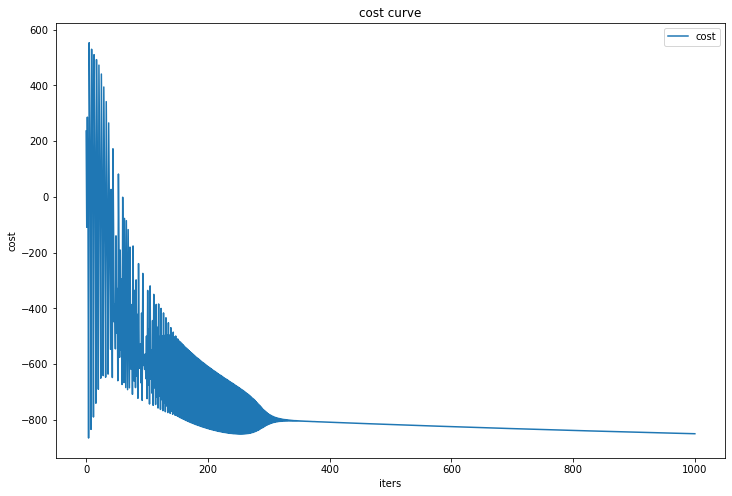

In [17]:
x = np.linspace(0, iters, iters)
plt.figure(figsize=(12, 8))
plt.xlabel('iters')
plt.ylabel('cost')
plt.title('cost curve')
plt.plot(x, cost, label='cost')
plt.legend()
plt.show()

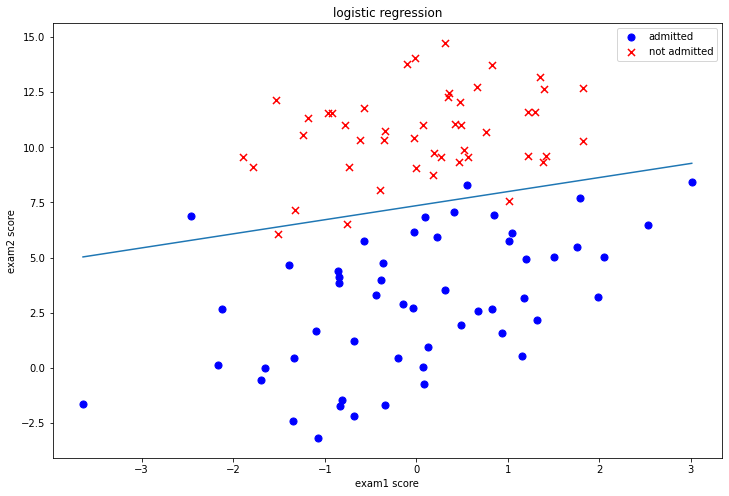

In [18]:
x = np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
f = -w[0, 0] / w[0, 2] - w[0, 1] / w[0, 2] * x

#fig, ax = plt.subplots(figsize=(12,8))
plt.figure(figsize=(12,8))
plt.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='admitted')
plt.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='not admitted')
plt.legend()
plt.xlabel('exam1 score')
plt.ylabel('exam2 score')
plt.title('logistic regression')
plt.plot(x, f, label='prediction')
plt.show()

In [19]:
predictions = predict(w, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 95%
